In [1]:
import pandas as pd

In [2]:
df3 = pd.read_csv('/content/drive/MyDrive/UNCC/Fall 2025/DTSC 3601/df3.csv')
df3

,involved_physical_force,involved_victim_restraint,showed_planning_or_stealth,Incident_Year,Birth_Year,Victim_ID,Victim_Incident_Count,Is_Severe_Assault,Vict_Descent_Clean_Black,Vict_Descent_Clean_Hispanic,Vict_Descent_Clean_Other/Unknown,Vict_Descent_Clean_White,Weapon_Category_Edged Weapon,Weapon_Category_Firearm,Weapon_Category_None,Weapon_Category_Other Weapon,Weapon_Category_Threat,Weapon_Category_Unknown
0,0,0,0,2020,1921,1921-Female-Asian-Olympic,2,0,False,False,False,False,False,False,True,False,False,False
1,0,0,0,2020,1921,1921-Female-Asian-Olympic,2,0,False,False,False,False,False,False,True,False,False,False
2,0,0,0,2020,1921,1921-Female-Black-Central,2,0,True,False,False,False,False,False,False,False,False,True
3,1,0,0,2020,1921,1921-Female-Black-Central,2,1,True,False,False,False,False,False,False,False,False,False
4,1,0,0,2020,1921,1921-Female-Black-Southeast,2,1,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732887,0,0,0,2024,2022,2022-Female-Hispanic-Central,2,0,False,True,False,False,False,False,True,False,False,False
732888,1,0,0,2024,2022,2022-Male-Black-Harbor,2,1,True,False,False,False,False,False,False,False,False,False
732889,0,0,0,2024,2022,2022-Male-Black-Harbor,2,0,True,False,False,False,False,False,True,False,False,False
732890,1,0,0,2024,2022,2022-Male-Black-Southwest,2,1,True,False,False,False,False,False,False,False,False,False


In [3]:
df3.columns.tolist()

['involved_physical_force',
 'involved_victim_restraint',
 'showed_planning_or_stealth',
 'Incident_Year',
 'Birth_Year',
 'Victim_ID',
 'Victim_Incident_Count',
 'Is_Severe_Assault',
 'Vict_Descent_Clean_Black',
 'Vict_Descent_Clean_Hispanic',
 'Vict_Descent_Clean_Other/Unknown',
 'Vict_Descent_Clean_White',
 'Weapon_Category_Edged Weapon',
 'Weapon_Category_Firearm',
 'Weapon_Category_None',
 'Weapon_Category_Other Weapon',
 'Weapon_Category_Threat',
 'Weapon_Category_Unknown']

In [4]:
# Separate your predictors (X) and your target variable (y)
X = df3.drop(columns=['Is_Severe_Assault', 'Victim_ID']) # Drop IDs and the target
y = df3['Is_Severe_Assault']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [7]:
# Separate predictors (X) and target variable (y)
X = df3.drop(columns=['Is_Severe_Assault', 'Victim_ID']) # Drop ID and the target
y = df3['Is_Severe_Assault']

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Create, train, and evaluate a baseline logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the model
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Train the model on your training data
log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test)

# Print the performance report
print("Logistic Regression Baseline Performance:")
print(classification_report(y_test, y_pred))

Logistic Regression Baseline Performance:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    143893
           1       0.97      0.99      0.98     75975

    accuracy                           0.99    219868
   macro avg       0.98      0.99      0.99    219868
weighted avg       0.99      0.99      0.99    219868



# Next for Sprint 4
- Feature Engineering
    - Time-Based Features (TIME OCC). You can create a new categorical feature for the time of day (e.g., 'Morning', 'Afternoon', 'Evening', 'Night'). The nature of crimes can vary significantly by time.
    - Geospatical Features (Advanced): This directly addresses "neighborhood-level factors". You can use LAT and LON columns to combine the crime data with external census data. You could then potentially add **poverty rate, median income, or population density**.

- Hyperparameter Tuning for Random Forest and XGBoost. (Use RandomizedSearchCV)

- Handling Class Imbalance (Advanced)
    - Use SMOTE (Synthetic Minority Over-sampling Technique). This creates new, synthetic examples of the minority class, which could help the moel learn its patterns better.


- All Subsets Classification function that trains and tests the best models and finds the best model.
  

# Random Forest

# XGBoost or LightGBM

In [8]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_clf.predict(X_test)

# Print performance report
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    143893
           1       0.99      0.98      0.98     75975

    accuracy                           0.99    219868
   macro avg       0.99      0.99      0.99    219868
weighted avg       0.99      0.99      0.99    219868



In [9]:
# XGBoost
import xgboost as xgb

# Initialize the model
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', scale_pos_weight=(y_train.value_counts()[0]/y_train.value_counts()[1]), random_state=42)

# Train the model
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_clf.predict(X_test)

# Print performance report
print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    143893
           1       0.98      0.99      0.98     75975

    accuracy                           0.99    219868
   macro avg       0.99      0.99      0.99    219868
weighted avg       0.99      0.99      0.99    219868



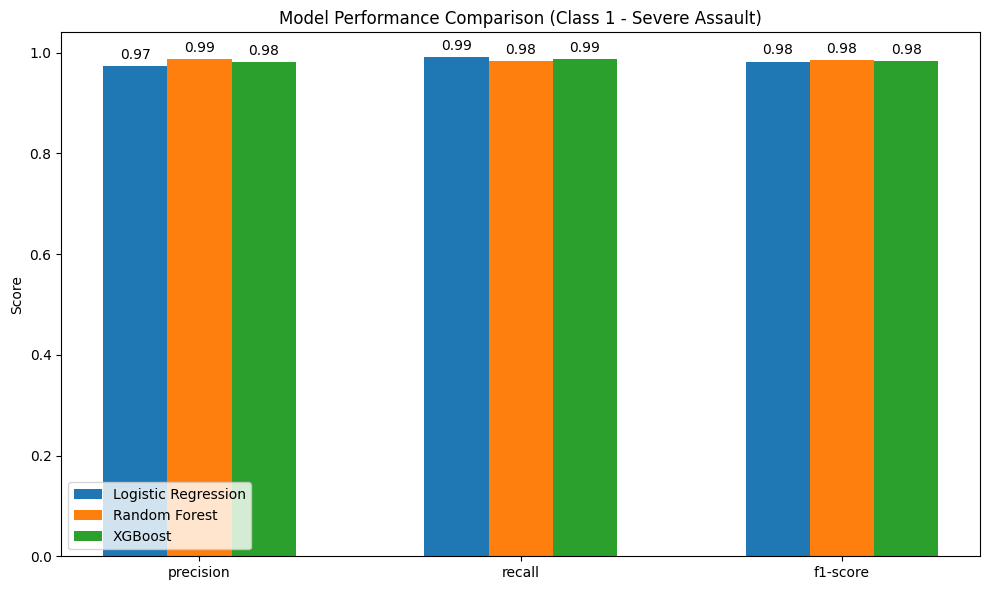

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Get classification reports for each model
report_lr = classification_report(y_test, y_pred, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)

# Extract metrics for class 1 (Severe Assault)
metrics = ['precision', 'recall', 'f1-score']
lr_metrics = [report_lr['1'][metric] for metric in metrics]
rf_metrics = [report_rf['1'][metric] for metric in metrics]
xgb_metrics = [report_xgb['1'][metric] for metric in metrics]

# Set up plot
x = np.arange(len(metrics))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for each model
rects1 = ax.bar(x - width, lr_metrics, width, label='Logistic Regression')
rects2 = ax.bar(x, rf_metrics, width, label='Random Forest')
rects3 = ax.bar(x + width, xgb_metrics, width, label='XGBoost')

# Add labels, title, and legend
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison (Class 1 - Severe Assault)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add value labels on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.2f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

# Data Leakage
The leak is happening because of how we created the features and the target variable from the same incident. Here’s the chain of events:

Weapon Category: We created Weapon_Category from the Weapon Desc of a crime.

Target Variable: We then defined our target, Is_Severe_Assault, to be 1 if Weapon_Category was 'Firearm', 'Bodily Force', etc.

Modeling: Finally, we fed the one-hot encoded Weapon_Category columns to the model as predictors.

The model simply learned the definition we created: "If the feature Weapon_Category_Bodily Force is 1, then the target Is_Severe_Assault is almost always 1."

In [11]:
df3.columns.tolist()

['involved_physical_force',
 'involved_victim_restraint',
 'showed_planning_or_stealth',
 'Incident_Year',
 'Birth_Year',
 'Victim_ID',
 'Victim_Incident_Count',
 'Is_Severe_Assault',
 'Vict_Descent_Clean_Black',
 'Vict_Descent_Clean_Hispanic',
 'Vict_Descent_Clean_Other/Unknown',
 'Vict_Descent_Clean_White',
 'Weapon_Category_Edged Weapon',
 'Weapon_Category_Firearm',
 'Weapon_Category_None',
 'Weapon_Category_Other Weapon',
 'Weapon_Category_Threat',
 'Weapon_Category_Unknown']

In [12]:
date = pd.read_csv('/content/drive/MyDrive/UNCC/Fall 2025/DTSC 3601/repeat_victims_data.csv')
date

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,...,Vict_Descent_Clean,Weapon_Category,involved_physical_force,involved_victim_restraint,showed_planning_or_stealth,Incident_Year,Birth_Year,Victim_ID,Victim_Incident_Count,Is_Severe_Assault
0,202008217,2020-04-02,2020-03-29,1700,20,Olympic,1,440,THEFT PLAIN - PETTY ($950 & UNDER),99,...,Asian,NaN,0,0,0,2020,1921,1921-Female-Asian-Olympic,2,0
1,202011553,2020-06-29,2020-06-28,1900,20,Olympic,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,99,...,Asian,NaN,0,0,0,2020,1921,1921-Female-Asian-Olympic,2,0
2,200108033,2020-02-28,2020-02-28,145,1,Central,1,330,BURGLARY FROM VEHICLE,99,...,Black,Unknown,0,0,0,2020,1921,1921-Female-Black-Central,2,0
3,200117379,2020-09-03,2020-09-03,840,1,Central,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,99,...,Black,Bodily Force,1,0,0,2020,1921,1921-Female-Black-Central,2,1
4,201806260,2020-02-09,2020-02-09,900,18,Southeast,1,440,THEFT PLAIN - PETTY ($950 & UNDER),99,...,Black,Bodily Force,1,0,0,2020,1921,1921-Female-Black-Southeast,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732887,240106960,2024-02-11,2024-02-11,1240,1,Central,2,762,LEWD CONDUCT,2,...,Hispanic,NaN,0,0,0,2024,2022,2022-Female-Hispanic-Central,2,0
732888,240505693,2024-02-14,2024-02-14,1813,5,Harbor,2,237,CHILD NEGLECT (SEE 300 W.I.C.),2,...,Black,Bodily Force,1,0,0,2024,2022,2022-Male-Black-Harbor,2,1
732889,240506539,2024-03-06,2024-03-06,1410,5,Harbor,2,237,CHILD NEGLECT (SEE 300 W.I.C.),2,...,Black,NaN,0,0,0,2024,2022,2022-Male-Black-Harbor,2,0
732890,240305318,2024-01-25,2024-01-25,1120,3,Southwest,2,624,BATTERY - SIMPLE ASSAULT,2,...,Black,Bodily Force,1,0,0,2024,2022,2022-Male-Black-Southwest,2,1


In [13]:
# Create a copy of df3
df4 = df3.copy()

# Add the 'DATE OCC' column from the 'date' DataFrame to df4
df4['DATE OCC'] = date['DATE OCC']

df4

,involved_physical_force,involved_victim_restraint,showed_planning_or_stealth,Incident_Year,Birth_Year,Victim_ID,Victim_Incident_Count,Is_Severe_Assault,Vict_Descent_Clean_Black,Vict_Descent_Clean_Hispanic,Vict_Descent_Clean_Other/Unknown,Vict_Descent_Clean_White,Weapon_Category_Edged Weapon,Weapon_Category_Firearm,Weapon_Category_None,Weapon_Category_Other Weapon,Weapon_Category_Threat,Weapon_Category_Unknown,DATE OCC
0,0,0,0,2020,1921,1921-Female-Asian-Olympic,2,0,False,False,False,False,False,False,True,False,False,False,2020-03-29
1,0,0,0,2020,1921,1921-Female-Asian-Olympic,2,0,False,False,False,False,False,False,True,False,False,False,2020-06-28
2,0,0,0,2020,1921,1921-Female-Black-Central,2,0,True,False,False,False,False,False,False,False,False,True,2020-02-28
3,1,0,0,2020,1921,1921-Female-Black-Central,2,1,True,False,False,False,False,False,False,False,False,False,2020-09-03
4,1,0,0,2020,1921,1921-Female-Black-Southeast,2,1,True,False,False,False,False,False,False,False,False,False,2020-02-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732887,0,0,0,2024,2022,2022-Female-Hispanic-Central,2,0,False,True,False,False,False,False,True,False,False,False,2024-02-11
732888,1,0,0,2024,2022,2022-Male-Black-Harbor,2,1,True,False,False,False,False,False,False,False,False,False,2024-02-14
732889,0,0,0,2024,2022,2022-Male-Black-Harbor,2,0,True,False,False,False,False,False,True,False,False,False,2024-03-06
732890,1,0,0,2024,2022,2022-Male-Black-Southwest,2,1,True,False,False,False,False,False,False,False,False,False,2024-01-25


In [14]:
import pandas as pd
import numpy as np

# Ensure the DataFrame is sorted by Victim and Date. This is CRITICAL.
df4.sort_values(by=['Victim_ID', 'DATE OCC'], inplace=True)

# Create the new target column by shifting the 'Is_Severe_Assault' values up by one
# This is done separately for each victim's group.
df4['Next_Incident_Is_Severe'] = df4.groupby('Victim_ID')['Is_Severe_Assault'].shift(-1)

# The last incident for each victim now has a NaN in the new target column because there is no 'next' incident.
# We must drop these rows as they cannot be used for training.
modeling_df = df4.dropna(subset=['Next_Incident_Is_Severe']).copy()

# Convert the new target column to an integer (0 or 1)
modeling_df['Next_Incident_Is_Severe'] = modeling_df['Next_Incident_Is_Severe'].astype(int)

# Now, create your final X and y for modeling
# X contains the features of the PRIOR incidents
X = modeling_df.drop(columns=['Victim_ID', 'DATE OCC', 'Is_Severe_Assault', 'Next_Incident_Is_Severe'])

# y contains the outcome of the SUBSEQUENT incident
y = modeling_df['Next_Incident_Is_Severe']

print("--- Final Model-Ready Data Shape ---")
print("Predictors (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

print("\n--- Example of the Transformation for Victim 'A' ---")
# This shows how the original data was transformed
print("Original Data for Victim 'A':")
print(df4[df4['Victim_ID'] == 'A'])
print("\nNew Modeling Data for Victim 'A' (2 predictive rows):")
print(modeling_df[modeling_df['Victim_ID'] == 'A'])

--- Final Model-Ready Data Shape ---
Predictors (X) shape: (716851, 16)
Target (y) shape: (716851,)

--- Example of the Transformation for Victim 'A' ---
Original Data for Victim 'A':
Empty DataFrame
Columns: [involved_physical_force, involved_victim_restraint, showed_planning_or_stealth, Incident_Year, Birth_Year, Victim_ID, Victim_Incident_Count, Is_Severe_Assault, Vict_Descent_Clean_Black, Vict_Descent_Clean_Hispanic, Vict_Descent_Clean_Other/Unknown, Vict_Descent_Clean_White, Weapon_Category_Edged Weapon, Weapon_Category_Firearm, Weapon_Category_None, Weapon_Category_Other Weapon, Weapon_Category_Threat, Weapon_Category_Unknown, DATE OCC, Next_Incident_Is_Severe]
Index: []

New Modeling Data for Victim 'A' (2 predictive rows):
Empty DataFrame
Columns: [involved_physical_force, involved_victim_restraint, showed_planning_or_stealth, Incident_Year, Birth_Year, Victim_ID, Victim_Incident_Count, Is_Severe_Assault, Vict_Descent_Clean_Black, Vict_Descent_Clean_Hispanic, Vict_Descent_Clean

In [15]:
modeling_df

,involved_physical_force,involved_victim_restraint,showed_planning_or_stealth,Incident_Year,Birth_Year,Victim_ID,Victim_Incident_Count,Is_Severe_Assault,Vict_Descent_Clean_Black,Vict_Descent_Clean_Hispanic,Vict_Descent_Clean_Other/Unknown,Vict_Descent_Clean_White,Weapon_Category_Edged Weapon,Weapon_Category_Firearm,Weapon_Category_None,Weapon_Category_Other Weapon,Weapon_Category_Threat,Weapon_Category_Unknown,DATE OCC,Next_Incident_Is_Severe
0,0,0,0,2020,1921,1921-Female-Asian-Olympic,2,0,False,False,False,False,False,False,True,False,False,False,2020-03-29,0
2,0,0,0,2020,1921,1921-Female-Black-Central,2,0,True,False,False,False,False,False,False,False,False,True,2020-02-28,1
4,1,0,0,2020,1921,1921-Female-Black-Southeast,2,1,True,False,False,False,False,False,False,False,False,False,2020-02-09,0
6,1,0,0,2020,1921,1921-Female-Hispanic-77th Street,3,1,False,True,False,False,False,False,False,False,False,False,2020-04-25,1
7,1,0,0,2020,1921,1921-Female-Hispanic-77th Street,3,1,False,True,False,False,False,False,False,False,False,False,2020-04-27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732882,0,0,0,2023,2021,2021-Unknown/Other-Other/Unknown-Pacific,2,0,False,False,True,False,False,False,True,False,False,False,2023-04-10,0
732884,1,0,0,2024,2022,2022-Female-Hispanic-77th Street,2,1,False,True,False,False,False,False,False,False,False,False,2024-01-02,0
732886,0,0,0,2024,2022,2022-Female-Hispanic-Central,2,0,False,True,False,False,False,False,True,False,False,False,2024-02-11,0
732888,1,0,0,2024,2022,2022-Male-Black-Harbor,2,1,True,False,False,False,False,False,False,False,False,False,2024-02-14,0


In [16]:
modeling_df.to_csv('modeling_df.csv', index=False)

from google.colab import files
files.download('modeling_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
# Redo
# Assume 'modeling_df' is the DataFrame you created in the previous step,
# after shifting the target and dropping NaN values.

# 1. Define the Target Variable (y)
# 'y' is the outcome of the *next* incident, which is our target.
y1 = modeling_df['Next_Incident_Is_Severe']

# 2. Define the Predictor Variables (X)
# 'X' is all the information about the *current* incident.
# We must drop the target variable and any identifiers or leaky columns.
X1 = modeling_df.drop(columns=[
    'Next_Incident_Is_Severe',  # This is our new target variable
    'Is_Severe_Assault',        # This is the original outcome of the current incident (leaky)
    'Victim_ID',                # This is an identifier, not a feature
    'DATE OCC',                 # The specific date is not a feature for the model
    # Add any other non-feature columns if they exist, e.g., DR_NO, Date Rptd
])

# 3. Verify the shapes to ensure they are correct
print("--- Final Shapes for Modeling ---")
print(f"Predictors (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

print("\n--- Columns in X (The Predictors) ---")
print(X.columns.tolist())


--- Final Shapes for Modeling ---
Predictors (X) shape: (716851, 16)
Target (y) shape: (716851,)

--- Columns in X (The Predictors) ---
['involved_physical_force', 'involved_victim_restraint', 'showed_planning_or_stealth', 'Incident_Year', 'Birth_Year', 'Victim_Incident_Count', 'Vict_Descent_Clean_Black', 'Vict_Descent_Clean_Hispanic', 'Vict_Descent_Clean_Other/Unknown', 'Vict_Descent_Clean_White', 'Weapon_Category_Edged Weapon', 'Weapon_Category_Firearm', 'Weapon_Category_None', 'Weapon_Category_Other Weapon', 'Weapon_Category_Threat', 'Weapon_Category_Unknown']


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

# --- 1. Data Preparation ---

# Assume 'X' and 'y' are your restructured, leakage-free DataFrames.
# X contains predictors from PRIOR incidents.
# y contains the target outcome from the SUBSEQUENT incident.

# Split data into training and testing sets.
# Stratify=y is crucial to maintain class balance in the split.
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42, stratify=y1)

# Identify numeric columns that need scaling.
# The binary (0/1) and one-hot encoded columns do not need to be scaled.
numeric_features = [col for col in X1.columns if X1[col].nunique() > 2]

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler ONLY on the training data and transform it
X1_train[numeric_features] = scaler.fit_transform(X1_train[numeric_features])

# Transform the test data using the scaler that was FIT on the training data
X1_test[numeric_features] = scaler.transform(X1_test[numeric_features])


# --- 2. Model Training and Evaluation ---

model_predictions = {}

# --- Model A: Logistic Regression (Baseline) ---
print("--- Training Logistic Regression (Baseline) ---")
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_reg.fit(X1_train, y1_train)
y_pred_log_reg = log_reg.predict(X1_test)
model_predictions['Logistic Regression'] = y_pred_log_reg
print("Done.\n")

# --- Model B: Random Forest Classifier ---
print("--- Training Random Forest Classifier ---")
rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)
rf_clf.fit(X1_train, y1_train)
y_pred_rf = rf_clf.predict(X1_test)
model_predictions['Random Forest'] = y_pred_rf
print("Done.\n")

# --- Model C: XGBoost Classifier ---
print("--- Training XGBoost Classifier ---")
# Calculate scale_pos_weight for the imbalanced data
count_neg = y1_train.value_counts()[0]
count_pos = y1_train.value_counts()[1]
scale_pos_weight_value = count_neg / count_pos

xgb_clf = xgb.XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight_value,
                            use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X1_train, y1_train)
y1_pred_xgb = xgb_clf.predict(X1_test)
model_predictions['XGBoost'] = y1_pred_xgb
print("Done.\n")


# --- 3. Final Model Comparison ---

results = {}
for model_name, y1_pred in model_predictions.items():
    results[model_name] = {
        'Precision': precision_score(y1_test, y1_pred, pos_label=1),
        'Recall': recall_score(y1_test, y1_pred, pos_label=1),
        'F1-Score': f1_score(y1_test, y1_pred, pos_label=1)
    }

comparison_df = pd.DataFrame(results).T

print("\n" + "="*50)
print("--- FINAL MODEL COMPARISON (METRICS FOR CLASS 1: SEVERE ASSAULT) ---")
print("="*50)
print(comparison_df.round(3))

--- Training Logistic Regression (Baseline) ---
Done.

--- Training Random Forest Classifier ---
Done.

--- Training XGBoost Classifier ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:51:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Done.


--- FINAL MODEL COMPARISON (METRICS FOR CLASS 1: SEVERE ASSAULT) ---
                     Precision  Recall  F1-Score
Logistic Regression      0.454   0.710     0.554
Random Forest            0.451   0.507     0.477
XGBoost                  0.465   0.706     0.561


# XGBoost is best performing
- Next is hyperparameter tuning

In [20]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# --- 1. Data Preparation (Context from your script) ---

# Assume 'X1' and 'y1' are your restructured, leakage-free DataFrames.
# Split data into training and testing sets.
X1_train, X1_test, y1_train, y1__test = train_test_split(X1, y1, test_size=0.3, random_state=42, stratify=y1)

# Identify and scale numeric features.
numeric_features = [col for col in X1.columns if X1[col].nunique() > 2]
scaler = StandardScaler()
X1_train[numeric_features] = scaler.fit_transform(X1_train[numeric_features])
X1_test[numeric_features] = scaler.transform(X1_test[numeric_features])


# --- 2. Create a Subsample for Faster Tuning ---

print(f"Original training set size: {len(X1_train)} rows")

# Create a smaller, stratified sample of the training data for the search.
# A 20% sample is often sufficient to find good hyperparameters much faster.
X_train_sample, _, y_train_sample, _ = train_test_split(
    X1_train, y1_train,
    train_size=0.20, # Using 20% of the training data
    random_state=42,
    stratify=y1_train
)
print(f"Using a sample of {len(X_train_sample)} rows for hyperparameter tuning.\n")


# --- 3. Hyperparameter Tuning Setup ---

# Define the hyperparameter grid to search over for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2]
}

# Set up the Stratified K-Fold cross-validator
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42) # Reduced to 3 splits for more speed

# Calculate scale_pos_weight for handling class imbalance (using the sample)
count_neg = y_train_sample.value_counts()[0]
count_pos = y_train_sample.value_counts()[1]
scale_pos_weight_value = count_neg / count_pos

# Initialize the XGBoost model
xgb_clf = xgb.XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight_value,
                            use_label_encoder=False, eval_metric='logloss')


# --- 4. Run the Randomized Search on the Sample ---

print("--- Starting Hyperparameter Tuning on the Data Sample ---")
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid,
    n_iter=20, # Keeping this at 20 is fine with a smaller dataset
    scoring='f1',
    cv=stratified_kfold,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit the search to the SMALLER training sample
random_search.fit(X_train_sample, y_train_sample)
print("Tuning Done.\n")


# --- 5. Train Final Model on Full Data and Evaluate ---

# Get the best parameters found during the search
best_params = random_search.best_params_
print("Best Hyperparameters Found:")
print(best_params)

print("\n--- Training Final XGBoost Model with Best Parameters on FULL Training Set ---")
# Initialize a new model with the best parameters
final_xgb_model = xgb.XGBClassifier(
    random_state=42,
    scale_pos_weight=scale_pos_weight_value, # Use weight from the full training set for accuracy
    use_label_encoder=False,
    eval_metric='logloss',
    **best_params # Unpacks the dictionary of best parameters
)

# Train this final model on the ENTIRE training set
final_xgb_model.fit(X1_train, y1_train)
print("Final Model Training Done.\n")

# Evaluate the final, optimized model on the unseen test data
print("--- Final Performance of Tuned Model on Unseen Test Data ---")
y_pred_tuned = final_xgb_model.predict(X1_test)
print(classification_report(y1_test, y_pred_tuned))


Original training set size: 501795 rows
Using a sample of 100359 rows for hyperparameter tuning.

--- Starting Hyperparameter Tuning on the Data Sample ---
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:07:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Tuning Done.

Best Hyperparameters Found:
{'subsample': 0.7, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8}

--- Training Final XGBoost Model with Best Parameters on FULL Training Set ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:07:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Final Model Training Done.

--- Final Performance of Tuned Model on Unseen Test Data ---
              precision    recall  f1-score   support

           0       0.79      0.54      0.65    140759
           1       0.46      0.73      0.56     74297

    accuracy                           0.61    215056
   macro avg       0.63      0.64      0.60    215056
weighted avg       0.68      0.61      0.62    215056



# Feature Importance for Best Performing Model So Far

/tmp/ipython-input-3354853157.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20), palette='rocket')


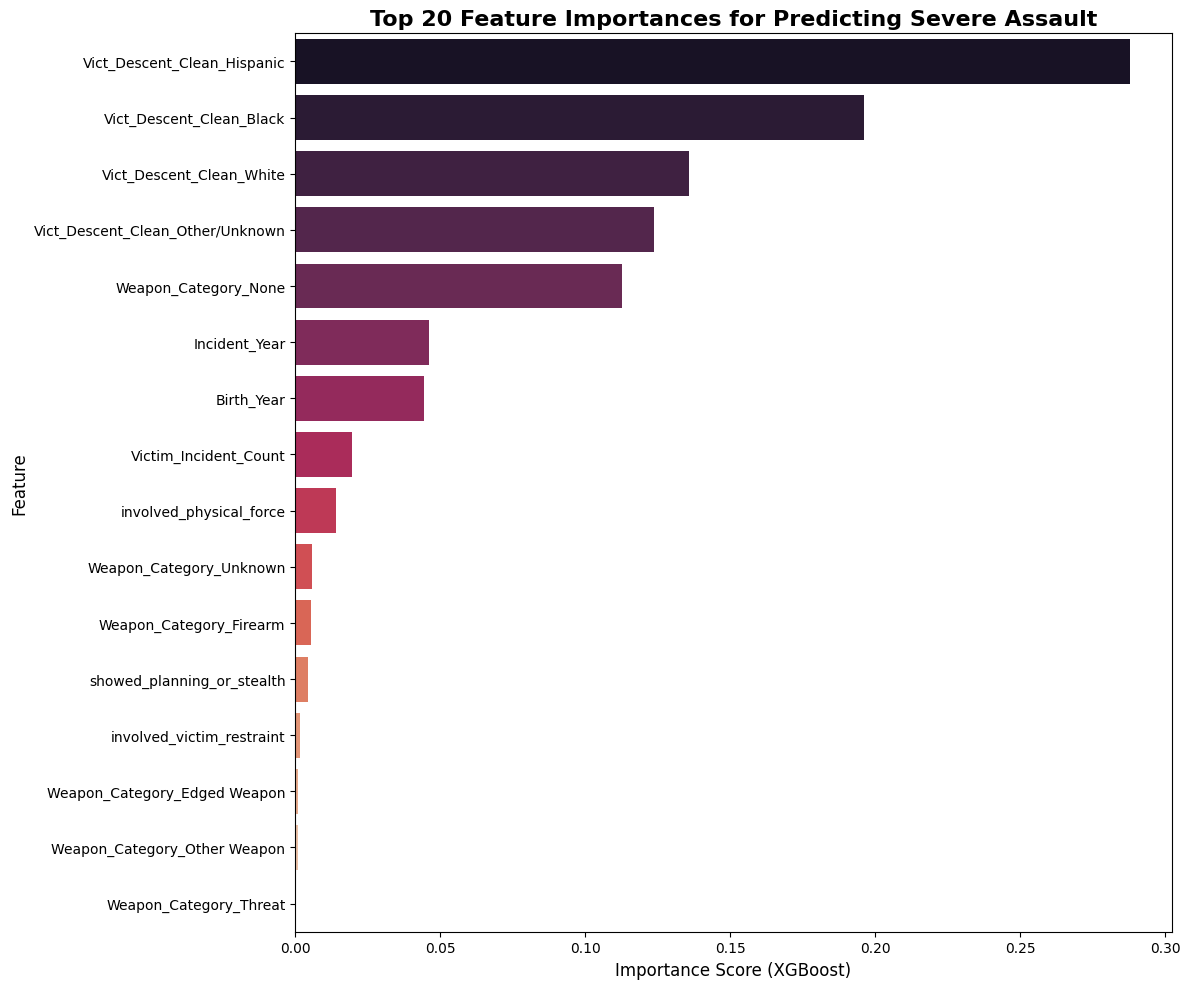

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'final_xgb_model' is your tuned and fully trained XGBoost model
# and 'X1_train' is your training data DataFrame with the correct column names.

# Get feature importances from the final model
importances = final_xgb_model.feature_importances_
feature_names = X1_train.columns

# Create a DataFrame for easy sorting and visualization
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

# Plot the top 20 most important features
plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20), palette='rocket')
plt.title('Top 20 Feature Importances for Predicting Severe Assault', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score (XGBoost)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()